<a href="https://colab.research.google.com/github/MonicaGaddipati123/GLOBAL-AIHUB-ML-COURSE/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Generate dataset using make_blobs function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).
Explore and analyse raw data.
Do preprocessing for classification.
Split your dataset into train and test test (0.7 for train and 0.3 for test).
Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Generating dataset using make_blobs function in the sklearn.datasets class
from sklearn.datasets import make_blobs

#Generating 2000 samples with 3 features (X) with one label (y)
X, y = make_blobs(n_samples=2000, centers=5, n_features=3, random_state=0)
X.shape

(2000, 3)

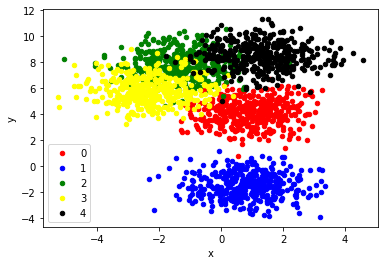

In [2]:

#Exploring and analysing raw data
from pandas import DataFrame
from matplotlib import pyplot

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [3]:
df.head()

,x,y,label
0,-2.533331,6.548725,2
1,-4.369632,6.377577,3
2,1.530365,4.957573,0
3,0.950258,8.067168,4
4,0.438700,8.915091,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   label   2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [5]:
df.describe()

,x,y,label
count,2000.000000,2000.000000,2000.000000
mean,-0.110206,4.982723,2.000000
std,1.750519,3.705361,1.414567
min,-5.270870,-3.892001,0.000000
25%,-1.433888,3.521267,1.000000
50%,0.112322,5.873096,2.000000
75%,1.260989,7.864442,3.000000
max,4.572122,11.318169,4.000000


In [6]:
df.dropna()

,x,y,label
0,-2.533331,6.548725,2
1,-4.369632,6.377577,3
2,1.530365,4.957573,0
3,0.950258,8.067168,4
4,0.438700,8.915091,4
...,...,...,...
1995,-0.896661,7.059679,2
1996,-3.453416,6.558041,3
1997,-1.116070,6.758778,2
1998,-0.869755,7.014111,2


In [7]:
df.isna().sum()

x        0
y        0
label    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["label"])
df.head()

,x,y,label,Label
0,-2.533331,6.548725,2,2
1,-4.369632,6.377577,3,3
2,1.530365,4.957573,0,0
3,0.950258,8.067168,4,4
4,0.438700,8.915091,4,4


In [9]:

categories = list(set(df.label))
df.drop(["label"], axis=1, inplace=True)
df.head()

,x,y,Label
0,-2.533331,6.548725,2
1,-4.369632,6.377577,3
2,1.530365,4.957573,0
3,0.950258,8.067168,4
4,0.438700,8.915091,4


In [10]:

#Locating features and label
X,y = df.iloc[:,:-1], df.iloc[:,-1]

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_test

,x,y
405,2.098990,-0.287123
1190,1.878659,9.437678
1132,-1.072182,8.178749
731,-2.956746,6.468182
1754,1.662250,2.684034
...,...,...
841,0.967203,-1.289644
108,-0.655172,8.808400
665,-2.196679,4.599465
1214,2.211871,9.013786


In [11]:

#Preprocessing for classification
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print("\nBias for training:",1-clf.score(X_train,y_train))
print("Bias for test:",1-clf.score(X_test,y_test))
print("\nVariance:",(1-clf.score(X_test,y_test))-(1-clf.score(X_train,y_train)))

Accuracy of train: 0.8764285714285714
Accuracy of test: 0.8783333333333333

Bias for training: 0.12357142857142855
Bias for test: 0.1216666666666667

Variance: -0.0019047619047618536


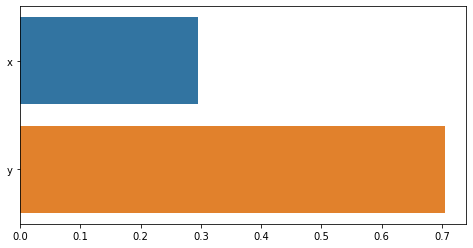

In [16]:

plt.figure(figsize=(8, 4))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [17]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       130
           1       1.00      1.00      1.00       107
           2       0.83      0.68      0.75       127
           3       0.77      0.83      0.80       106
           4       0.82      0.97      0.89       130

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



In [18]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.88120408974687
Recall = 0.8799323451767368
Accuracy = 0.8783333333333333
F1 Score = 0.8773804103409265


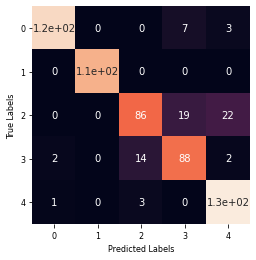

In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 4))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 8)
ax.yaxis.set_ticklabels(categories, fontsize = 8, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 8)
ax.set_ylabel('True Labels',fontsize = 8)
plt.show()

In [20]:

#XGBoost Algorithm 
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':4, 
         'eta':1, 
         'objective':'multi:softprob', 
         'eval_metric':'mlogloss',
         'num_class':5}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

categories

[0, 1, 2, 3, 4]

In [22]:

#Predictions
preds = model.predict(dmatrix_test)
preds[:20]

array([[1.8727792e-03, 9.9496621e-01, 1.0138052e-03, 9.4431901e-04,
        1.2028894e-03],
       [1.2905191e-03, 1.1962507e-03, 1.5011730e-03, 1.3447949e-03,
        9.9466729e-01],
       [7.1220514e-03, 6.6018072e-03, 9.0306520e-01, 5.6831464e-02,
        2.6379498e-02],
       [4.8094043e-03, 3.7048582e-03, 4.3051362e-02, 9.4449121e-01,
        3.9432030e-03],
       [9.9356043e-01, 1.3539876e-03, 1.6310542e-03, 1.5192617e-03,
        1.9352612e-03],
       [5.8046165e-03, 5.3806072e-03, 9.5649308e-01, 1.9103253e-02,
        1.3218442e-02],
       [1.2905191e-03, 1.1962507e-03, 1.5011730e-03, 1.3447949e-03,
        9.9466729e-01],
       [6.9160266e-03, 6.4108316e-03, 8.7694156e-01, 1.0072808e-01,
        9.0035126e-03],
       [1.2905191e-03, 1.1962507e-03, 1.5011730e-03, 1.3447949e-03,
        9.9466729e-01],
       [5.7681571e-03, 5.3468104e-03, 9.5048523e-01, 1.7035061e-02,
        2.1364782e-02],
       [2.1535107e-03, 2.0768002e-03, 8.3260210e-03, 9.8525685e-01,
        2.18

In [23]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 4, 2, 3, 0, 2, 4, 2, 4, 2, 3, 0, 1, 0, 4, 3, 0, 3, 0, 0, 1, 3,
       1, 2, 4, 4, 0, 1, 4, 0, 2, 2, 4, 2, 3, 2, 3, 0, 3, 0, 1, 0, 4, 3,
       4, 0, 1, 4, 3, 3, 1, 0, 2, 4, 2, 4, 2, 0, 0, 2, 0, 2, 1, 1, 4, 1,
       4, 1, 2, 1, 4, 1, 2, 4, 2, 1, 3, 3, 2, 0, 2, 4, 1, 2, 2, 2, 4, 4,
       0, 4, 1, 1, 0, 0, 1, 1, 1, 4, 4, 3, 2, 0, 1, 0, 1, 0, 2, 3, 4, 4,
       0, 2, 3, 0, 2, 3, 4, 2, 1, 4, 2, 3, 0, 1, 0, 0, 2, 3, 2, 0, 2, 4,
       4, 3, 1, 4, 2, 2, 2, 2, 0, 3, 1, 2, 2, 0, 1, 3, 3, 4, 1, 2, 2, 3,
       4, 0, 0, 0, 4, 0, 4, 0, 2, 1, 4, 4, 0, 4, 4, 2, 2, 0, 4, 0, 0, 4,
       2, 1, 4, 4, 0, 0, 1, 2, 1, 3, 1, 4, 3, 1, 4, 4, 3, 1, 0, 1, 0, 2,
       1, 4, 4, 4, 1, 1, 0, 3, 1, 1, 0, 4, 0, 2, 0, 4, 0, 2, 0, 3, 2, 1,
       1, 2, 0, 4, 0, 3, 3, 3, 0, 3, 1, 2, 4, 3, 4, 3, 3, 0, 3, 4, 1, 2,
       3, 0, 4, 1, 2, 0, 2, 4, 4, 4, 3, 1, 1, 0, 2, 4, 2, 2, 4, 1, 0, 0,
       0, 2, 4, 3, 2, 4, 4, 1, 0, 2, 1, 3, 1, 1, 2, 3, 4, 4, 0, 4, 2, 3,
       0, 0, 2, 0, 0, 1, 4, 1, 2, 2, 0, 4, 3, 1, 0,

In [24]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9005852143182855
Recall = 0.8991204872975784
Accuracy = 0.9


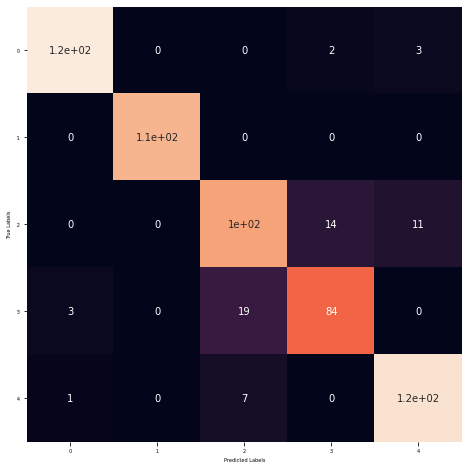

In [27]:

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 5)
ax.yaxis.set_ticklabels(categories, fontsize = 5,rotation=5)
ax.set_xlabel('Predicted Labels',fontsize = 5)
ax.set_ylabel('True Labels',fontsize = 5)
plt.show()

In [ ]:

#GridSearchCV
from xgboost.sklearn import XGBClassifier
use_label_encoder=False #To fix an error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=2000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, eval_metric='mlogloss', seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("\nTuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

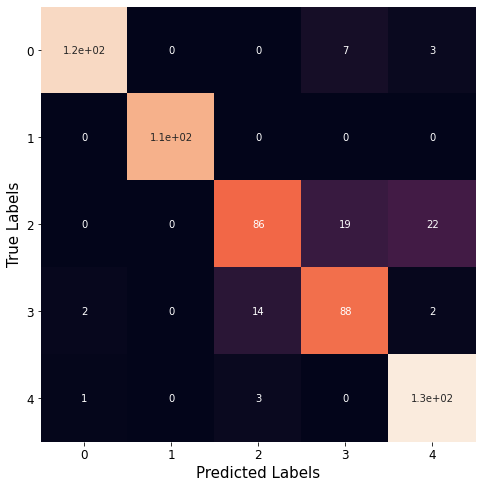

In [29]:

plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

The results obtained by XGBoost Algorithm (using GridSearchCV) are more accurate than the results obtained by DecisionTree